In [1]:
#JOSE LUIS TORRES CC: 1010001242
from scipy.integrate import solve_bvp
import numpy as np
import random  
import numpy as np      #LIBRERIAS
import matplotlib.pyplot as plt  
import pandas as pd
import random as rd
from scipy.optimize import curve_fit as CF 
import time 
from scipy import optimize
from scipy.misc import derivative as dv
import sympy as sym
import scipy
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp as SS
from scipy.integrate import odeint as OO
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

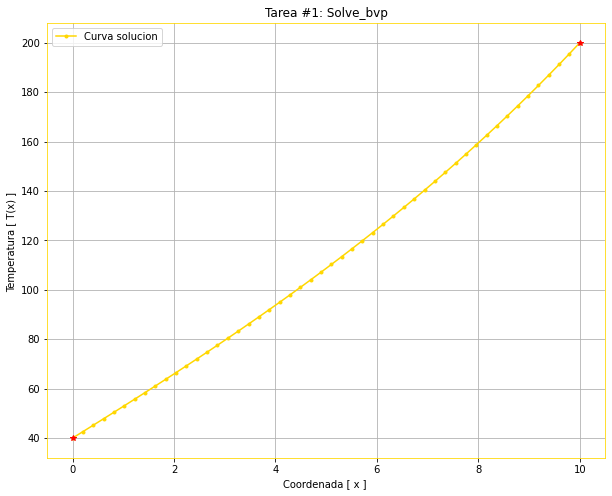

In [2]:

P= 50
y0 = np.ones((2,P))

#EDO de Segundo Orden en Sistema De 2 EDO Primer Orden 
def derivs(t,z):
    dydx=np.zeros((z.shape))

    dydx[0]=z[1]
    dydx[1]=0.01*z[0] - 0.2

    return dydx

yi,yf=40,200.0 #Condiciones 

def bc(ya,yb):

    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - yi
    residuals[1]=yb[0] - yf
    return residuals

a,b=0,10
t = np.linspace(a,b,P) #Intervalo de tiempo en SEGUNDOS

sol = solve_bvp(derivs, bc, t, y0)


#GRAFICO

fig= plt.figure(figsize = (10,8))

plt.plot(sol.x, sol.y[0],'.-',color="gold",label='Curva solucion')

plt.plot([a,b],[yi,yf],'*r') #Valores iniciales

plt.title("Tarea #1: Solve_bvp")
plt.ylabel("Temperatura [ T(x) ] ")
plt.xlabel("Coordenada [ x ] ")
plt.legend(loc="best")

#EJE
#plt.axhline(y=10, xmin=0, xmax=1, color = "gray", linestyle = 'dashed')
#plt.axhline(y=0, xmin=0.05, xmax=0.95, color = "gray", linestyle = 'dashed')
#plt.axvline(x=0, ymin=0.05, ymax=0.95, color = "gray", linestyle = 'dashed')
#MARCO

P= plt.gca()
P.spines['right'].set_color('gold') 
P.spines['top'].set_color('gold')
P.spines['bottom'].set_color('gold') 
P.spines['left'].set_color('gold') 

plt.grid()
plt.show()



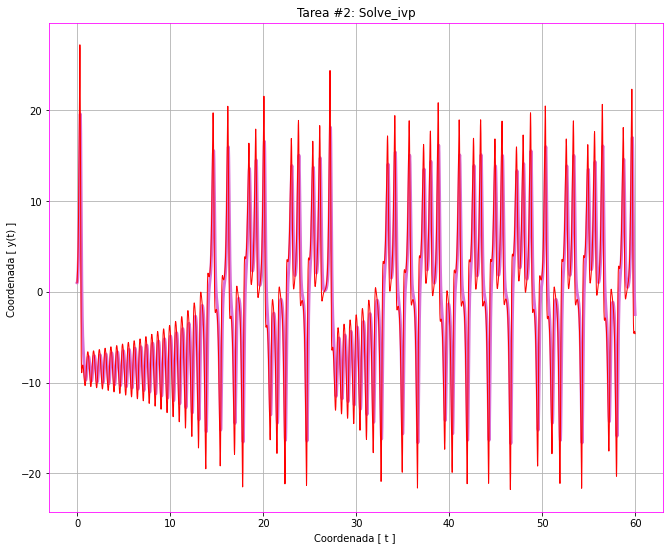

In [3]:
#METODO Solve_ivp


#Sistema de ecuaciones
def derivs(x, y):
    dydx=np.zeros((y.shape))
    
    dydx[0] = sigma * (y[1] - y[0])
    dydx[1] = y[0] * (rho - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - beta * y[2]
    return dydx
sigma,rho,beta=10,28,8/3


t_span=[0,60.0] #Intervalo 

N=5000 #Precisicion: recomendado > 4000

myt_eval=np.linspace(0,60.0,N) # Intervalo OPCIONAL

y01=[1,1,1] #Condiciones de frontera

#Solucion
sol = solve_ivp(derivs, t_span, y01, method='RK45', t_eval=myt_eval)



#GRAFICO

fig = plt.figure(figsize = (11,9))
plt.plot(sol.t,sol.y[0],"-", color="orchid",lw=3,label="")
plt.plot(sol.t,sol.y[1],"-",color="r",lw=1,label="")

plt.title("Tarea #2: Solve_ivp")
plt.ylabel("Coordenada [ y(t) ] ")
plt.xlabel("Coordenada [ t ] ")
#plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('magenta') 
P.spines['top'].set_color('magenta')
P.spines['bottom'].set_color('magenta') 
P.spines['left'].set_color('magenta') 
plt.grid()
plt.show()


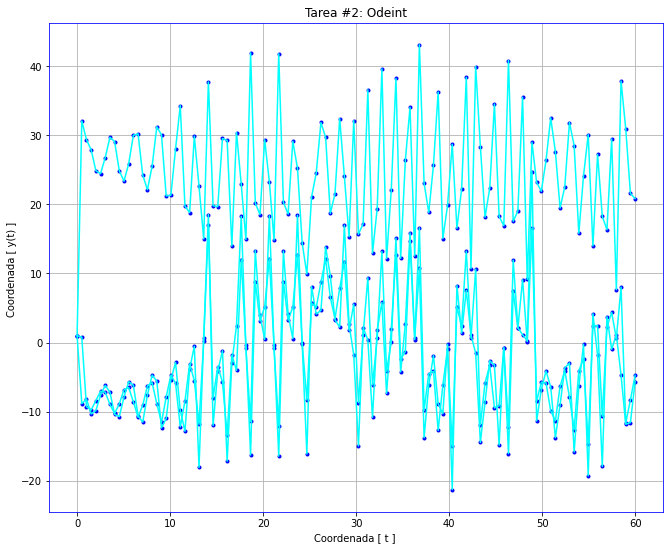

In [4]:
#METODO odeint

def der(y,x):
    dydx=np.zeros((y.shape))
    
    dydx[0] = sigma * (y[1] - y[0])
    dydx[1] = y[0] * (rho - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - beta * y[2]
    return dydx
sigma,rho,beta=10,28,8/3

aa,bb=0,60
xx=np.linspace(aa,bb,120) #Intervalo

y0=[1,1,1]
sol=OO(der,y0,xx) #odeint


#GRAFICO

fig = plt.figure(figsize = (11,9))

plt.plot(xx,sol,".",color="b")
plt.plot(xx,sol,"-",color="cyan")
plt.title("Tarea #2: Odeint")
plt.ylabel("Coordenada [ y(t) ] ")
plt.xlabel("Coordenada [ t ] ")
#plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('b') 
P.spines['top'].set_color('b')
P.spines['bottom'].set_color('b') 
P.spines['left'].set_color('b') 
plt.grid()
plt.show()
plt.show()


**Sin duda alguna, el metodo ***integrate.odeint*** se queda atras frente al diseño mas efeciente del metodo ***integrate.solve_ivp*** el cual ofece una mejor lectura de las ecuaciones y asi permite la realizacion de un analisis adecuado y buena capacidad de visualizacion.**



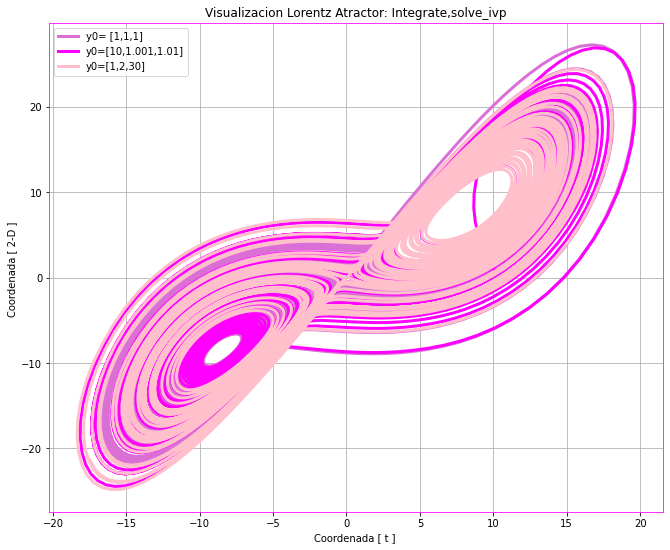

Profesor pido excusas por no entregar las tareas en su debido momento, the semester was a bit crazy near the end.   c : c 


In [5]:
t_span=[0,60.0] #Intervalo 

N=8000 #Precisicion: recomendado > 4000


myt_eval=np.linspace(0,60.0,N) # Intervalo OPCIONAL

#Solucion
sol = solve_ivp(derivs, t_span, y01, method='RK45', t_eval=myt_eval)

y011=[10,1.001,1.01]
sol2 = solve_ivp(derivs, t_span, y011, method='RK45', t_eval=myt_eval)

y0111=[1,2,30]
sol3 = solve_ivp(derivs, t_span, y0111, method='RK45', t_eval=myt_eval)
#GRAFICO

fig = plt.figure(figsize = (11,9))
plt.plot(sol.y[0],sol.y[1],"-", color="orchid",lw=3,label="y0= [1,1,1] ")
plt.plot(sol2.y[0],sol2.y[1],"-", color="magenta",lw=3,label="y0=[10,1.001,1.01]")
plt.plot(sol3.y[0],sol3.y[1],"-", color="pink",lw=3,label="y0=[1,2,30]")

plt.title("Visualizacion Lorentz Atractor: Integrate,solve_ivp")
plt.ylabel("Coordenada [ 2-D ] ")
plt.xlabel("Coordenada [ t ] ")
plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('magenta') 
P.spines['top'].set_color('magenta')
P.spines['bottom'].set_color('magenta') 
P.spines['left'].set_color('magenta') 
plt.grid()
plt.show()
print("Profesor pido excusas por no entregar las tareas en su debido momento, the semester was a bit crazy near the end.   c : c ")